# WeatherPy

## Analysis

* The only strong relationship that exist is between the latitude and max temperature due to it being close to the sun. Humidity, cloudiness, and wind speed does not seem to be affected by how far a city is from the equator.
* Cities in the northern hemisphere, however, does seem to a bit more humid. Might be due to not looking at enough cities  or other factors not present in the data.
* Very interesting to see that there are many cities with a lot of cloudiness. Perhaps due to elevation or other data not being examined.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import scipy.stats as st
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

598

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it's being processed (with the city number and city name).

In [3]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build partial query URL
query_url = f"{url}&appid={weather_api_key}&units={units}&q="

# Create lists to store info
city_name=[]
lat=[]
lng=[]
max_temp=[]
humidity=[]
cloudiness=[]
wind_speed=[]
country=[]
date=[]

record=1

print("Beginning Data Retrieval")
print("------------------------")

for city in cities:
    
    try:
        response = requests.get(query_url + city).json()
        city_name.append(response['name'])
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        max_temp.append(response['main']['temp_max'])
        humidity.append(response['main']['humidity'])
        cloudiness.append(response['clouds']['all'])
        wind_speed.append(response['wind']['speed'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        print(f"Processing Record {record} | {response['name']}")
        
        record += 1
        
        time.sleep(1)
        
    except:
        print("City not found. Skipping...")
    
    continue

    
print("------------------------")    
print("Data Retrieval Complete")
print("------------------------")

Beginning Data Retrieval
------------------------
Processing Record 1 | Tasiilaq
Processing Record 2 | Qaanaaq
City not found. Skipping...
Processing Record 3 | Namatanai
Processing Record 4 | Ostrovnoy
Processing Record 5 | Yulara
Processing Record 6 | New Norfolk
City not found. Skipping...
Processing Record 7 | Kaitangata
Processing Record 8 | Atuona
Processing Record 9 | Andenes
Processing Record 10 | Lebu
City not found. Skipping...
Processing Record 11 | Yeppoon
Processing Record 12 | Albany
Processing Record 13 | Bluff
Processing Record 14 | Constitución
Processing Record 15 | Mar del Plata
Processing Record 16 | Marabu
Processing Record 17 | Saint-Augustin
Processing Record 18 | Codrington
Processing Record 19 | Punta Arenas
Processing Record 20 | Cidreira
Processing Record 21 | Kara
Processing Record 22 | Ribeira Grande
City not found. Skipping...
Processing Record 23 | Villarrobledo
Processing Record 24 | Rikitea
Processing Record 25 | Vaini
Processing Record 26 | Acapulco de

Processing Record 230 | Arraial do Cabo
Processing Record 231 | Kyren
Processing Record 232 | Mount Isa
Processing Record 233 | Atlantic City
Processing Record 234 | Nyurba
Processing Record 235 | Itoman
Processing Record 236 | Fortuna
City not found. Skipping...
Processing Record 237 | Rocha
Processing Record 238 | Padang
Processing Record 239 | Lata
Processing Record 240 | Madimba
Processing Record 241 | Puerto Colombia
Processing Record 242 | Bredasdorp
Processing Record 243 | Laas
Processing Record 244 | Marzuq
Processing Record 245 | Sinnamary
Processing Record 246 | Dvinskoy
Processing Record 247 | French Rocks
Processing Record 248 | Nhulunbuy
Processing Record 249 | Kidal
Processing Record 250 | Bambous Virieux
Processing Record 251 | Hamilton
Processing Record 252 | San Patricio
Processing Record 253 | Çubuk
Processing Record 254 | Huilong
Processing Record 255 | Hirtshals
Processing Record 256 | Honningsvåg
City not found. Skipping...
Processing Record 257 | Khorramshahr
Proc

Processing Record 456 | Adiaké
Processing Record 457 | Lehigh Acres
Processing Record 458 | Nishihara
Processing Record 459 | Hofn
Processing Record 460 | Pechora
Processing Record 461 | Korem
Processing Record 462 | Kuršumlija
Processing Record 463 | Arāria
City not found. Skipping...
Processing Record 464 | Skjervøy
Processing Record 465 | Vetlanda
Processing Record 466 | Kimbe
Processing Record 467 | Kovdor
Processing Record 468 | Galveston
Processing Record 469 | San Antonio
Processing Record 470 | Asău
City not found. Skipping...
Processing Record 471 | Qidong
Processing Record 472 | Santa Ana
Processing Record 473 | Port Hedland
Processing Record 474 | Dawei
Processing Record 475 | Jumla
Processing Record 476 | Omsukchan
Processing Record 477 | Amapá
Processing Record 478 | Odienné
Processing Record 479 | Patacamaya
Processing Record 480 | Edremit
Processing Record 481 | Luwuk
Processing Record 482 | Conde
Processing Record 483 | Mersin Province
Processing Record 484 | Buraidah
C

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
city_data = pd.DataFrame({"City": city_name,
                         "Lat": lat,
                         "Lng": lng,
                         "Max Temp": max_temp,
                         "Humidity": humidity,
                         "Cloudiness": cloudiness,
                         "Wind Speed": wind_speed,
                         "Country": country, 
                         "Date": date})
                         
city_data.to_csv("city_data.csv")

city_data.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Tasiilaq,65.61,-37.64,30.20,42,0,3.36,GL,1604373582
1,Qaanaaq,77.48,-69.36,9.45,81,100,5.32,GL,1604373583
2,Namatanai,-3.67,152.43,84.06,73,73,4.70,PG,1604373584
3,Ostrovnoy,68.05,39.51,42.21,82,100,29.71,RU,1604373331
4,Yulara,-25.24,130.99,96.80,12,0,12.75,AU,1604373586


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [5]:
# Check if there are any cities with humidity > 100%
city_data.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,551.000000,551.000000,551.000000,551.000000,551.000000,551.000000,5.510000e+02
mean,20.610871,17.184519,57.932377,71.471869,49.406534,8.255245,1.604374e+09
std,33.069102,90.884852,22.168753,20.843282,41.044077,6.312701,2.045188e+02
min,-54.800000,-175.200000,-13.110000,7.000000,0.000000,0.270000,1.604373e+09
25%,-5.825000,-63.830000,44.600000,60.000000,1.000000,3.600000,1.604374e+09
50%,26.330000,20.020000,60.840000,76.000000,49.000000,6.440000,1.604374e+09
75%,47.755000,100.355000,76.725000,88.000000,91.500000,11.295000,1.604374e+09
max,77.480000,178.420000,102.200000,100.000000,100.000000,38.740000,1.604374e+09


In [6]:
# Locate those cities in the df
city_data.loc[city_data['Humidity'] == 100]

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
48,Heréd,47.71,19.63,52.00,100,75,1.12,HU,1604373634
137,Port Hardy,50.70,-127.42,48.20,100,90,18.34,CA,1604373740
177,Cayenne,4.93,-52.33,75.20,100,90,10.40,GF,1604373785
199,Ntoum,0.38,9.78,77.00,100,75,10.29,GA,1604373808
235,Fortuna,40.60,-124.16,48.99,100,90,4.70,US,1604373812
299,Avera,33.19,-82.53,42.01,100,1,2.24,US,1604373916
366,Kitimat,54.05,-128.65,48.20,100,75,20.80,CA,1604373989
410,Novi Šeher,44.51,18.03,51.80,100,0,2.24,BA,1604374036
429,Tilichiki,60.47,166.10,32.70,100,100,4.81,RU,1604374056
455,Adiaké,5.29,-3.30,75.20,100,40,3.36,CI,1604374084


In [7]:
#  Get the indices of cities that have humidity over 100%.
humidity100 = city_data.index[city_data['Humidity'] == 100].tolist()
humidity100

[48, 137, 177, 199, 235, 299, 366, 410, 429, 455, 464]

In [8]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
clean_city_data = city_data.drop(index=humidity100, inplace=False)
len(clean_city_data)

540

In [9]:
clean_city_data.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,540.000000,540.000000,540.000000,540.000000,540.000000,540.000000,5.400000e+02
mean,20.291352,18.071185,58.000833,70.890741,49.138889,8.257278,1.604374e+09
std,33.188190,90.791340,22.299391,20.648510,41.137639,6.311060,2.053568e+02
min,-54.800000,-175.200000,-13.110000,7.000000,0.000000,0.270000,1.604373e+09
25%,-6.460000,-63.227500,44.487500,60.000000,1.000000,3.642500,1.604374e+09
50%,26.135000,20.695000,61.000000,75.500000,47.000000,6.540000,1.604374e+09
75%,47.655000,100.780000,77.000000,87.000000,92.250000,11.237500,1.604374e+09
max,77.480000,178.420000,102.200000,99.000000,100.000000,38.740000,1.604374e+09


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

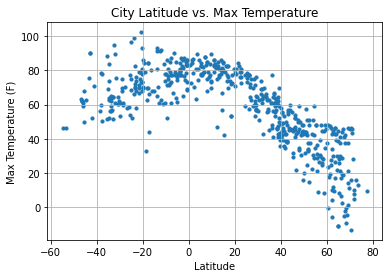

In [10]:
# Latitude vs Temp
plt.scatter(clean_city_data["Lat"], clean_city_data["Max Temp"], marker="o", s=10)
plt.title("City Latitude vs. Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid(True)

plt.savefig("Latitude_MaxTemp.png")
plt.show()

### Analysis
* Plot is showing the relationship between latitude of the cities and it's max temperature.
* Based on the graph, max temperature is higher when the latitude is close to 0 or the equator.

## Latitude vs. Humidity Plot

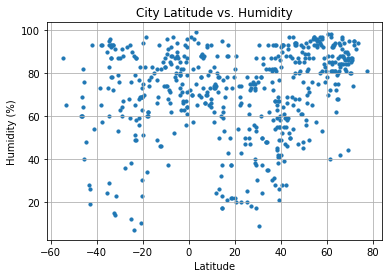

In [11]:
# Latitude vs Humidity
plt.scatter(clean_city_data["Lat"], clean_city_data["Humidity"], marker="o", s=10)
plt.title("City Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

plt.savefig("Latitude_Humidity.png")
plt.show()

### Analysis
* Plot is showing the relationship between latitude of the cities and it's humidity.
* Based on the graph, a very weak relationship may exist (higher humidity at latitudes above 40?).

## Latitude vs. Cloudiness Plot

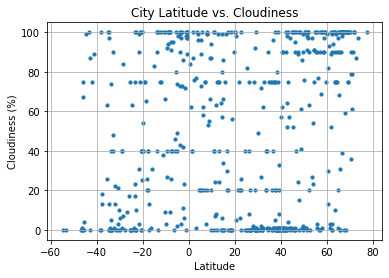

In [12]:
# Latitude vs Cloudiness
plt.scatter(clean_city_data["Lat"], clean_city_data["Cloudiness"], marker="o", s=10)
plt.title("City Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

plt.savefig("Latitude_Cloudiness.png")
plt.show()

### Analysis
* Plot is showing the relationship between latitude of the cities and it's cloudiness.
* Based on the graph, the dots are all over the place showing no relationship whatsoever.

## Latitude vs. Wind Speed Plot

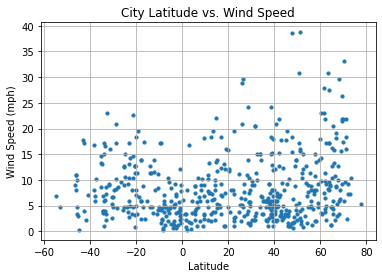

In [13]:
# Latitude vs Cloudiness
plt.scatter(clean_city_data["Lat"], clean_city_data["Wind Speed"], marker="o", s=10)
plt.title("City Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid(True)

plt.savefig("Latitude_WindSpeed.png")
plt.show()

### Analysis
* Plot is showing the relationship between latitude of the cities and it's wind speed.
* Based on the graph, not much of a relationship exists between the two variables.

## Linear Regression

In [14]:
# Separate df by hemisphere
north_city_data = clean_city_data.loc[clean_city_data['Lat'] >= 0]
south_city_data = clean_city_data.loc[clean_city_data['Lat'] < 0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

LinregressResult(slope=-0.9986357227567763, intercept=90.68798179048909, rvalue=-0.8647211197405394, pvalue=1.6598213546675525e-111, stderr=0.030318829672525402)


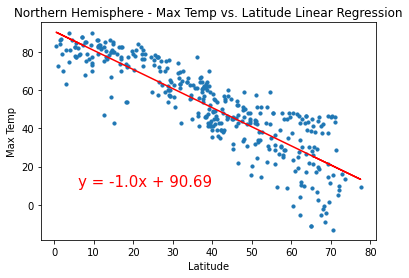

In [15]:
# Northern Hemisphere - Max Temp vs. Latitude Linear Regression
x_values = north_city_data["Lat"]
y_values = north_city_data["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, marker="o", s=10)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.title('Northern Hemisphere - Max Temp vs. Latitude Linear Regression')
plt.xlabel('Latitude')
plt.ylabel('Max Temp')

print(linregress(x_values, y_values))

plt.savefig("N_MaxTemp_Latitude.png")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

LinregressResult(slope=0.39012110028328817, intercept=79.87789689090233, rvalue=0.4450799245778697, pvalue=9.51368222078963e-10, stderr=0.06020022661941161)


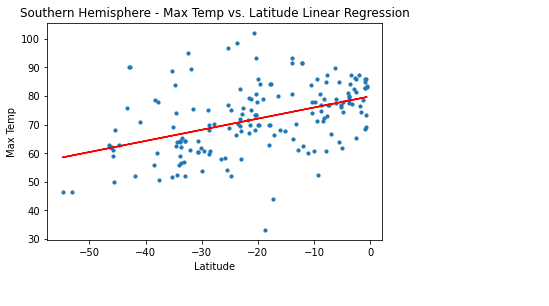

In [16]:
# Southern Hemisphere - Max Temp vs. Latitude Linear Regression
x_values = south_city_data["Lat"]
y_values = south_city_data["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, marker="o", s=10)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.title('Southern Hemisphere - Max Temp vs. Latitude Linear Regression')
plt.xlabel('Latitude')
plt.ylabel('Max Temp')

print(linregress(x_values, y_values))

plt.savefig("S_MaxTemp_Latitude.png")
plt.show()

### Analysis
* There is a strong relationship with both showing a high rvalue between the latitude and max temperature of a city.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

LinregressResult(slope=0.3406751998219832, intercept=57.68347638446794, rvalue=0.3261568498343931, pvalue=1.4394600859832393e-10, stderr=0.05161195716715468)


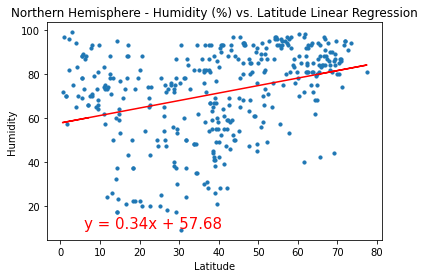

In [17]:
# Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression
x_values = north_city_data["Lat"]
y_values = north_city_data["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, marker="o", s=10)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.title('Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression')
plt.xlabel('Latitude')
plt.ylabel('Humidity')

print(linregress(x_values, y_values))

plt.savefig("N_Humidity_Latitude.png")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

LinregressResult(slope=0.310356335371537, intercept=76.82977251878171, rvalue=0.20930975646709987, pvalue=0.005857625188425412, stderr=0.11120354968610068)


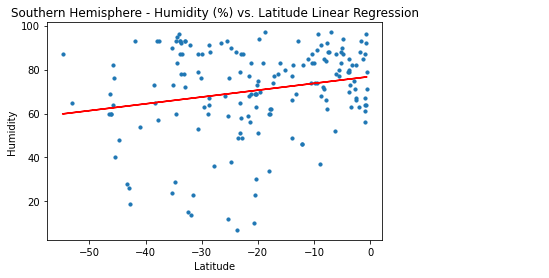

In [18]:
# Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression
x_values = south_city_data["Lat"]
y_values = south_city_data["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, marker="o", s=10)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.title('Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression')
plt.xlabel('Latitude')
plt.ylabel('Humidity')

print(linregress(x_values, y_values))

plt.savefig("S_Humidity_Latitude.png")
plt.show()

### Analysis
* Weak to no relationship between the latitude and humidity of a city.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

LinregressResult(slope=0.46378399715634877, intercept=31.61874159274037, rvalue=0.22131983875521063, pvalue=1.8318812773801844e-05, stderr=0.10681915357634847)


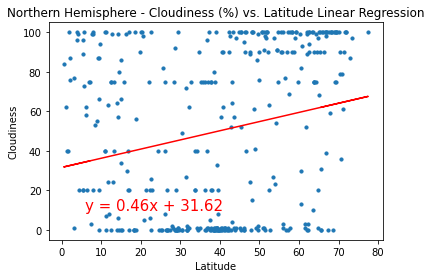

In [19]:
# Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression
x_values = north_city_data["Lat"]
y_values = north_city_data["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, marker="o", s=10)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.title('Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')

print(linregress(x_values, y_values))

plt.savefig("N_Cloudiness_Latitude.png")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

LinregressResult(slope=1.147899466263091, intercept=70.96688505968277, rvalue=0.39513188899165064, pvalue=8.129588901495229e-08, stderr=0.2046799441610674)


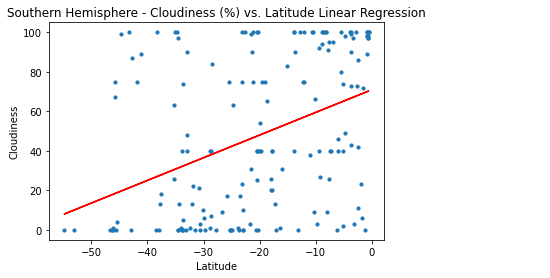

In [20]:
# Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression
x_values = south_city_data["Lat"]
y_values = south_city_data["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, marker="o", s=10)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.title('Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')

print(linregress(x_values, y_values))

plt.savefig("S_Cloudiness_Latitude.png")
plt.show()

### Analysis
* Weak relationship for cities in the nothern hemisphere, which could have other attributing factors.
* No relationship for cities in the southern hemisphere.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

LinregressResult(slope=0.0751622061203857, intercept=5.649638594965717, rvalue=0.22009600933070073, pvalue=2.0427805374885298e-05, stderr=0.017412630427728806)


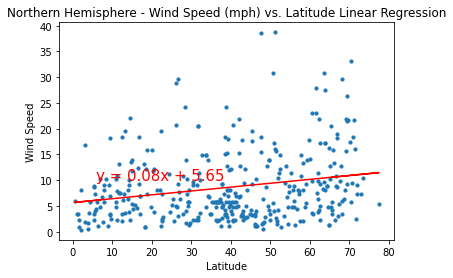

In [21]:
# Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression
x_values = north_city_data["Lat"]
y_values = north_city_data["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, marker="o", s=10)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.title('Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')

print(linregress(x_values, y_values))

plt.savefig("N_WindSpeed_Latitude.png")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

LinregressResult(slope=-0.10078357144598662, intercept=5.476208594247774, rvalue=-0.2742131359875051, pvalue=0.0002725603062270297, stderr=0.027108320952592538)


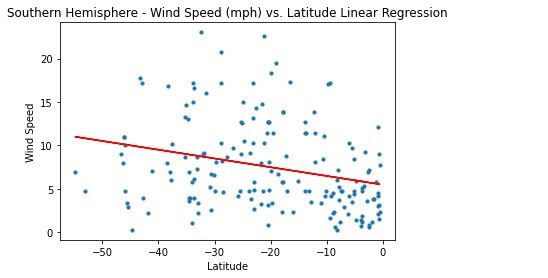

In [22]:
# Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression
x_values = south_city_data["Lat"]
y_values = south_city_data["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, marker="o", s=10)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.title('Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')

print(linregress(x_values, y_values))

plt.savefig("S_WindSpeed_Latitude.png")
plt.show()

### Analysis
* Based on the plot, latitude does not affect the wind speed of a city.